# Iris Classification with Logistic Regression

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease, mean_loss_decrease

## Import Data

In [2]:
df = pd.read_csv("data/iris.csv", index_col='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

Data terdiri dari 150 baris dan 5 kolom.

In [4]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Tipe data telah sesuai.

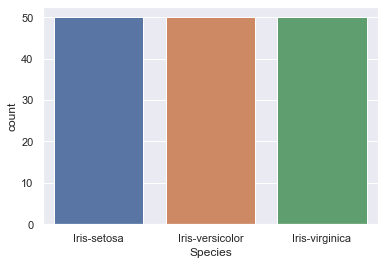

In [5]:
sns.countplot(df.Species);

Target variabel sangat balanced.

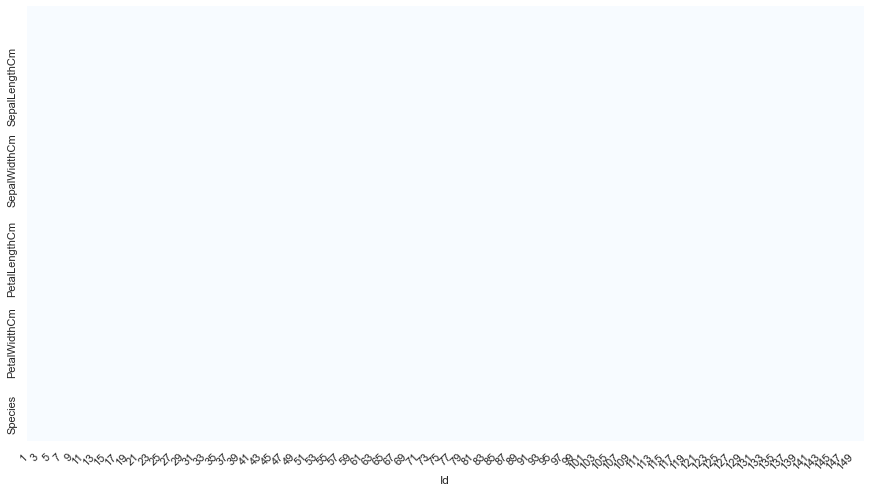

In [6]:
plot_missing_value(df)

Data telah bersih.

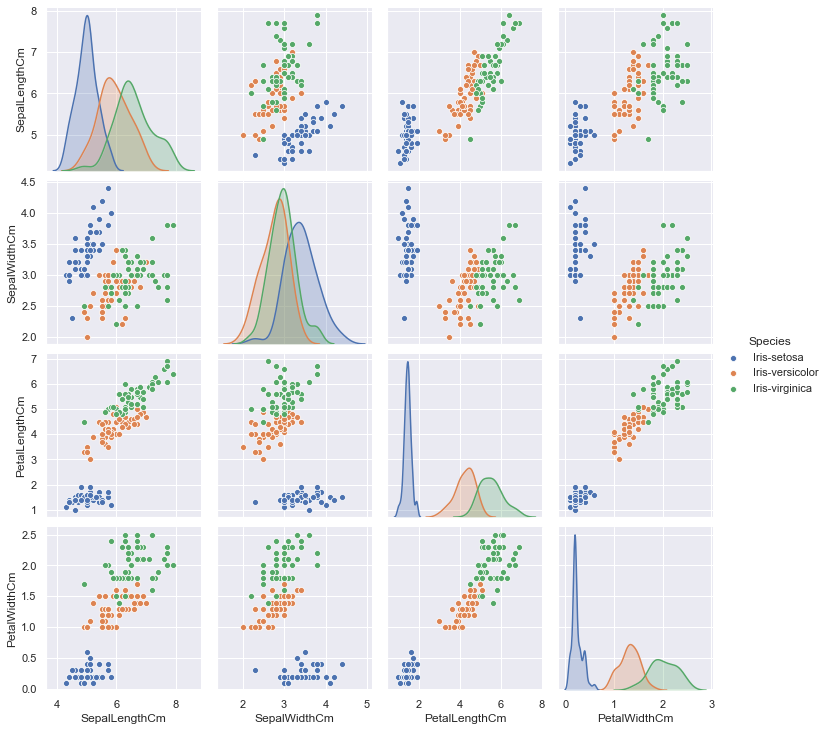

In [7]:
sns.pairplot(df, hue='Species');

## Dataset Splitting

In [8]:
X = df.drop(columns="Species")
y = df.Species

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

## Modeling

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

In [10]:
gsp.logreg_params

{'algo__fit_intercept': [True, False],
 'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [11]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
131,7.4,2.8,6.1,1.9
123,7.7,2.8,6.7,2.0
82,5.5,2.4,3.7,1.0
72,6.1,2.8,4.0,1.3
90,5.5,2.5,4.0,1.3


In [12]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']),

])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(n_jobs=-1, random_state=42, multi_class='multinomial'))
])


model = GridSearchCV(pipeline, gsp.logreg_params, cv=5, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    3.9s


{'algo__C': 1.0, 'algo__fit_intercept': True}
0.9732142857142857 0.9640316205533598 0.9473684210526315


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    4.5s finished


## Features Important

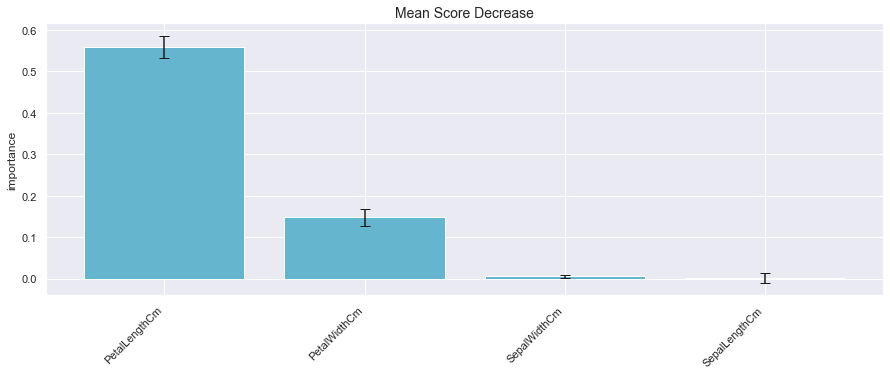

In [13]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True)

Petal Length merupakan fitur paling penting dalam mengklasifikasikan bunga iris.

## Polynomial Features 

In [14]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2), ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']),

])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(n_jobs=-1, random_state=42, multi_class='multinomial'))
])


model = GridSearchCV(pipeline, gsp.logreg_poly_params, cv=5, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.7s


{'algo__C': 0.001, 'algo__fit_intercept': False, 'prep__numeric__poly__degree': 3, 'prep__numeric__poly__interaction_only': False}
0.9821428571428571 0.9727272727272727 1.0


[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   10.9s finished


Skor (akurasi) yang sempurna pada data test.

## Save Model

In [15]:
save_model(model.best_estimator_, "iris.pkl")

Model is pickled as model/iris.pkl
